In this notebook, you will explore a Fermi-LAT extension analysis for (real) LAT data that spans 12 years (August 4 2008 - May 3 2020) over the energies 300MeV to 2TeV for a known gamma-ray emitting source in the Milky Way Galactic plane. 

## Example Analysis of a Pulsar Wind Nebula MSH 15-56 (aka G326.3-1.8)

We are performing a [binned likelihood analysis](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/binned_likelihood_tutorial.html) with Fermipy using ~12-years of LAT data in the region that contains MSH 15-56. 

To run this notebook with precomputed files, you should have the following files already in your home directory:
* ``EV*.fits where * is 0,1,2,3,4``
* ``events.txt``

and your FermiPy working directory (``./data_300mev-2tev_12-year``):
* ``ltcube_00.fits``
* ``srcmdl_00.xml``
* ``srcmap_00.fits``

And your SC file is in the main directory.

Verify the files exist:

In [1]:
ls ../

advanced_extension_analysis_example/         SC00.fits
msh15-56_simple_extension_analysis_example/


In [2]:
ls ./

data_300mev-2tev_12-year/  EV03.fits            msh15-56_pwn_mask.png
EV00.fits                  EV04.fits            msh15-56_radio_pwn_snr.png
EV01.fits                  events.txt           Simple_Extension_Analysis.ipynb
EV02.fits                  lat_data_params.png


In [3]:
ls data_300mev-2tev_12-year/

ltcube_00.fits  srcmap_00.fits  srcmdl_00.xml


## Import necessary packages including FermiPy

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis

## Make the configuration file to initiate Fermi-LAT data setup.

Our file is called ```config_300mev-2tev_12-year.yaml``` and it will read like this:

```
data:
  evfile : events.txt
  scfile : ../SC00.fits

binning:
  roiwidth   : 10.0
  binsz      : 0.1
  binsperdec : 10

selection :
  emin : 300
  emax : 2000000
  zmax    : 100
  evclass : 128
  tmin    : 239500801.000
  tmax    : 610156805.000
  filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'
  ra      : 238.11
  dec     : -56.210

gtlike:
  edisp : True
  irfs : 'P8R3_SOURCE_V3'
  edisp_disable: ['isodiff', 'galdiff']

model:
  src_roiwidth : 15.0
  galdiff  : '$(CONDA_PREFIX)/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits'
  isodiff  : 'iso_P8R3_SOURCE_V3_PSF3_v1.txt'
  catalogs : ['4FGL-DR3']

components:
  - { selection : { evtype : 32 } } # PSF3

fileio:
   outdir : data_300mev-2tev_12-year
```

Note: This time we will only use PSF3 events, which correspond to the most accurately reconstructed events. We generate the file using the code below.

In [5]:
config = open('config_300mev-2tev_12-year.yaml',"w")
config.close()
config = open('config_300mev-2tev_12-year.yaml',"a")
config.write("data:\n evfile : events.txt\n scfile : ../SC00.fits\n\n")
config.write("binning:\n roiwidth   : 10.0\n binsz      : 0.1\n binsperdec : 10\n\n") 
config.write("selection:\n emin    : 300\n emax    : 2e6\n zmax    : 100\n evclass : 128\n tmin    : 239500801.000\n tmax    : 610156805.000\n filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'\n ra      : 238.11\n dec     : -56.210 \n\n" )
config.write("gtlike:\n edisp : True\n irfs  : 'P8R3_SOURCE_V3'\n edisp_disable  : ['isodiff', 'galdiff']\n\n")
config.write("model:\n src_roiwidth : 15.0\n galdiff  : '$CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits'\n isodiff  : 'iso_P8R3_SOURCE_V3_PSF3_v1.txt'\n extdir   : '$CONDA_PREFIX/LAT_extended_sources_12years/Templates'\n catalogs : '4FGL-DR3'\n\n")
config.write("components:\n - { selection : { evtype : 32 } } # PSF3\n\n")
config.write("fileio: \n outdir : data_300mev-2tev_12-year\n\n\n")
config.close()

## Setup the object and load in the config file
We are reading in the configuration file here and configuring the analysis

In [6]:
gta = GTAnalysis('config_300mev-2tev_12-year.yaml',logging={'verbosity' : 3})

2023-06-04 14:28:56 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.0 
ScienceTools version 2.2.11


In [7]:
gta.setup()

2023-06-04 14:28:57 INFO    GTAnalysis.setup(): Running setup.
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/evfile_00.txt outfile=/jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ft1_00.fits ra=238.11 dec=-56.21 rad=7.5710678118654755 tmin=239500801.0 tmax=610156805.0 emin=300.0 emax=2000000.0 zmin=0.0 zmax=100.0 evclass=128 evtype=32 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.run_gtapp(): 
2023-06-04 14:28:57 INFO    GTBinnedAnalysis.run_gtapp(): WARNING:
2023-06-0

Drm_Cache::update Measured counts < 0 4FGL J1515.6-5817c 37 -1.98225e-18 5.32298e-18
1.63057 3.00924 5.03216 7.53582 10.2594 12.7268 14.2135 14.3895 13.1786 10.8782 8.14846 5.50621 3.36725 1.91352 1.00146 0.47014 0.204013 0.08145 0.0297757 0.0100093 0.00310083 0.000880777 0.00022719 5.28992e-05 1.12313e-05 2.16627e-06 3.80019e-07 6.09132e-08 8.99521e-09 1.23435e-09 1.55495e-10 1.81128e-11 1.93478e-12 1.88445e-13 1.60689e-14 1.22998e-15 8.5169e-17 5.32298e-18 


2023-06-04 14:37:10 INFO    GTAnalysis.setup(): Initializing source properties
2023-06-04 14:37:13 INFO    GTAnalysis.setup(): Finished setup.


In [8]:
gta.print_roi()

2023-06-04 14:38:20 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.4-5612e  SpatialMap     LogParabola       0.000       nan       532.3
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112       nan      1876.5
4FGL J1555.8-5551   PointSource    PowerLaw          0.600       nan        91.2
4FGL J1554.4-5506   PointSource    LogParabola       1.131       nan       144.2
4FGL J1550.8-5424c  PointSource    LogParabola       1.822       nan       587.8
4FGL J1600.3-5811   PointSource    LogParabola       2.249       nan       460.8
4FGL J1550.4-5354c  PointSource    PowerLaw          2.319       nan       239.8
4FGL J1548.4-5344c  PointSource    LogParabola       2.536       nan       666.4
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717       nan        16.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.7

In [8]:
opt = gta.optimize()

2023-05-23 17:30:23 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', 'isodiff', '4FGL J1553.8-5325e', '4FGL J1521.9-5735', '4FGL J1601.3-5224']


/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS: 421115.323
Fitting shape 4FGL J1521.9-5735 TS:   2135.097
Fitting shape 4FGL J1553.8-5325e TS:   1281.400
Fitting shape 4FGL J1552.9-5607e TS:    683.497
Fitting shape 4FGL J1615.3-5136 TS:    620.656
Fitting shape isodiff TS:    564.835
Fitting shape 4FGL J1514.2-5909e TS:    519.764
Fitting shape 4FGL J1528.4-5838 TS:    428.073
Fitting shape 4FGL J1616.2-5054e TS:    346.081
Fitting shape 4FGL J1543.6-5148 TS:    296.782
Fitting shape 4FGL J1616.6-5341 TS:    227.881
Fitting shape 4FGL J1611.9-5125c TS:    215.591
Fitting shape 4FGL J1601.3-5224 TS:    207.959
Fitting shape 4FGL J1617.3-5849 TS:    205.520
Fitting shape 4FGL J1610.3-5154c TS:    194.728
Fitting shape 4FGL J1531.5-5612 TS:    183.430
Fitting shape 4FGL J1603.3-6010 TS:    133.698
Fitting shape 4FGL J1615.3-5146e TS:    127.427
Fitting shape 4FGL J1600.3-5811 TS:    125.394
Fitting shape 4FGL J1552.4-5612e TS:     93.494
Fitting shape 4FGL J1534.0-5232 TS:     93.363
Fitting shape 4FGL J1524.

2023-05-23 17:32:34 INFO    GTAnalysis.optimize(): Finished
2023-05-23 17:32:34 INFO    GTAnalysis.optimize(): LogLike: 628130.450335 Delta-LogLike: 2495.882868
2023-05-23 17:32:34 INFO    GTAnalysis.optimize(): Execution time: 130.98 s


In [9]:
gta.print_roi()

2023-05-23 17:32:34 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.4-5612e  SpatialMap     LogParabola       0.000    100.24       543.6
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    685.49      2018.5
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     17.16       126.8
4FGL J1554.4-5506   PointSource    LogParabola       1.131     12.30       131.0
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     68.54      1360.4
4FGL J1600.3-5811   PointSource    LogParabola       2.249    126.43       466.8
4FGL J1550.4-5354c  PointSource    PowerLaw          2.319      7.56       253.9
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     29.16       611.1
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     17.25        18.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.7

In [10]:
gta.delete_sources(minmax_ts=[-1,15])
gta.delete_sources(minmax_npred=[-1,5])

2023-05-23 17:32:34 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1554.4-5506
2023-05-23 17:32:34 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1550.4-5354c
2023-05-23 17:32:34 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1551.9-6015
2023-05-23 17:32:34 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1536.2-6023
2023-05-23 17:32:34 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1615.3-6034
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1518.9-5903c
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1626.1-5904
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1537.3-6110
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1515.6-5817c
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1512.9-5639
2023-05-23 17:32:35 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1519.7-6013c
2023-0

In [11]:
gta.print_roi()

2023-05-23 17:32:38 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.4-5612e  SpatialMap     LogParabola       0.000    100.24       543.6
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    685.49      2018.5
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     17.16       126.8
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     68.54      1360.4
4FGL J1600.3-5811   PointSource    LogParabola       2.249    126.43       466.8
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     29.16       611.1
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     17.25        18.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1491.21      8565.4
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    203.64      1756.8
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [12]:
# Free Normalization of all sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 25
gta.free_sources(minmax_ts=[25,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components. 
#Typically this happens when you set sources within 3.0degree to be free, but just in case we do it again.
gta.free_source('galdiff')
gta.free_source('isodiff')

2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1552.4-5612e    : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1552.9-5607e    : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1555.8-5551     : ['Prefactor']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1550.8-5424c    : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1600.3-5811     : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1548.4-5344c    : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1533.9-5712e    : ['Prefactor']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1553.8-5325e    : ['norm']
2023-05-23 17:32:38 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1531.5-5612     : ['Prefact

In [13]:
baseline_fit = gta.fit(min_fit_quality=3)

2023-05-23 17:32:38 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 17:34:21 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:34:21 INFO    GTAnalysis.fit(): LogLike:   628067.637 DeltaLogLike:       43.722 


In [14]:
gta.print_roi()

2023-05-23 17:34:21 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.4-5612e  SpatialMap     LogParabola       0.000    101.37       546.9
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    663.92      1995.8
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     17.31       125.8
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.24      1596.3
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.27       434.1
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.15       722.2
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.32        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1393.06      8657.0
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    210.18      1812.1
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [15]:
baseline = gta.write_roi('baseline_model.npy',make_plots=True)

2023-05-23 17:34:21 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/baseline_model_00.xml...
2023-05-23 17:34:23 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/baseline_model.fits...
2023-05-23 17:34:37 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/baseline_model.npy...


In [16]:
ls data_300mev-2tev_12-year/*.png

data_300mev-2tev_12-year/baseline_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_spectrum.png
data_300mev-2tev_12-year/baseline_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_spectrum.png
data_300mev-2tev_12-year/no_pwn_baseline_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_spectrum.png
data_300mev-2tev_12-year/ps_model_mode

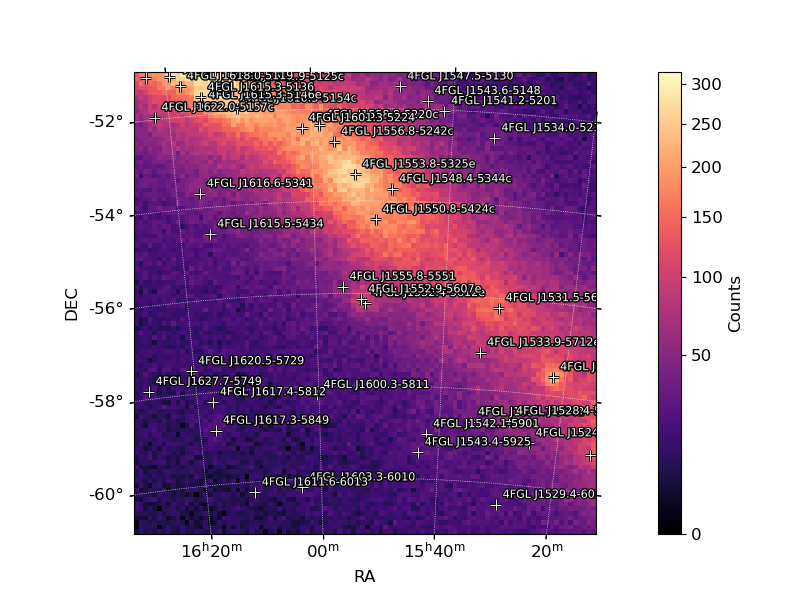

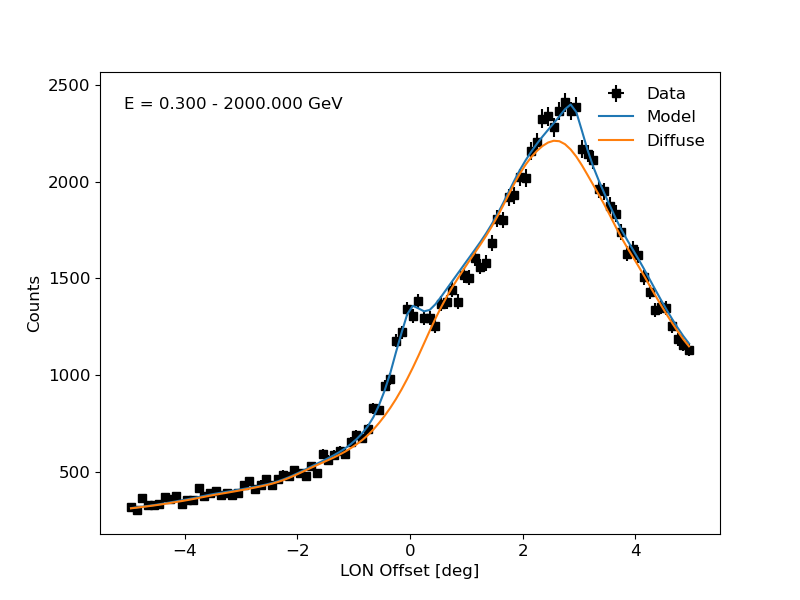

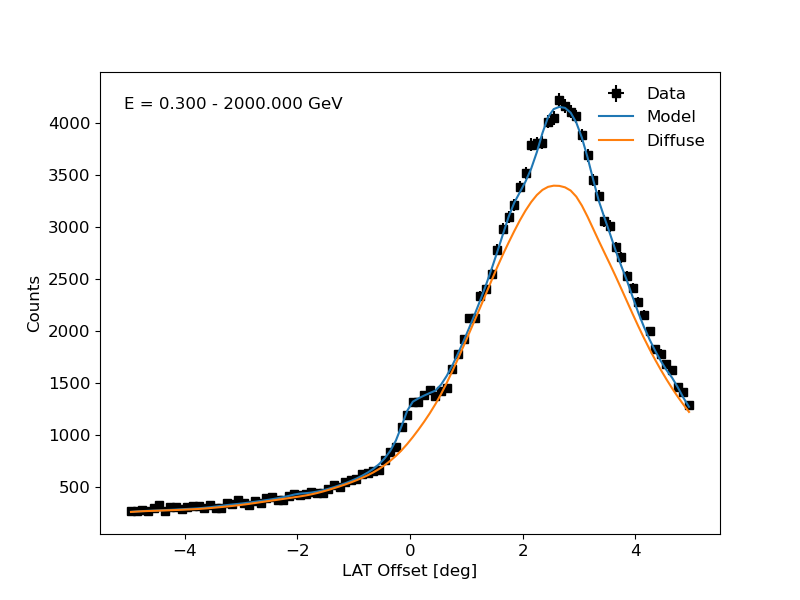

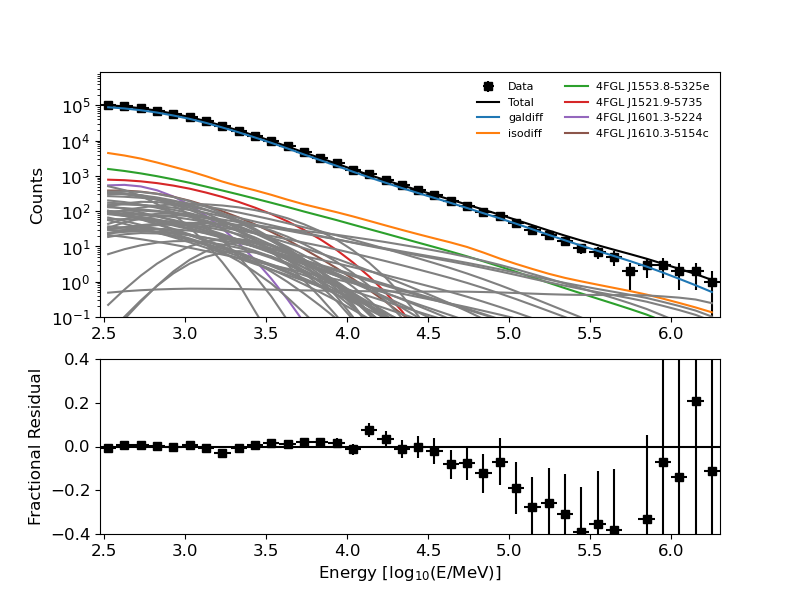

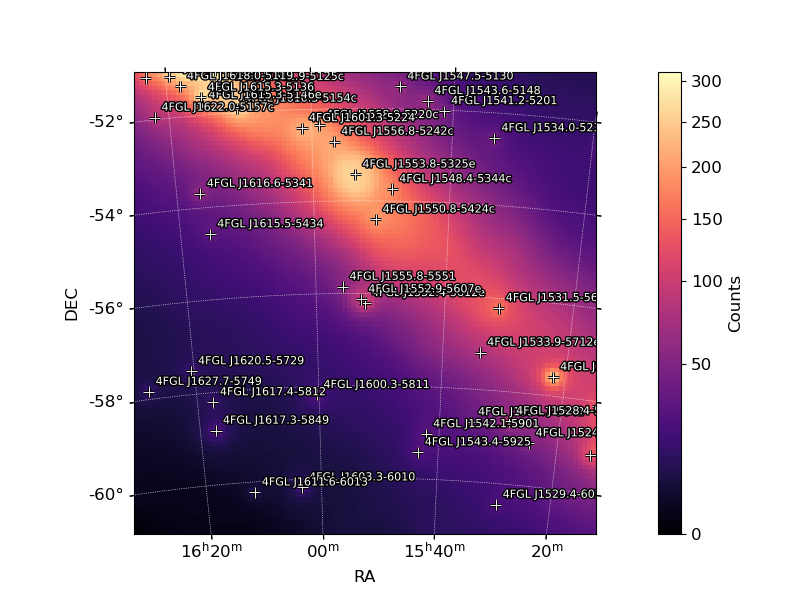

In [17]:
from IPython.display import display, Image
image_names = ['baseline_model_counts_map_2.477_6.301', 'baseline_model_counts_map_xproj_2.477_6.301', 'baseline_model_counts_map_yproj_2.477_6.301',
              'baseline_model_counts_spectrum', 'baseline_model_model_map_2.477_6.301']
for i in image_names:
    display(Image('data_300mev-2tev_12-year/%s.png'%i))

Let's pretend we don't already know that MSH 15-56 is a gamma-ray emitter. This means we need to look at any source emission that is being modeled by this Fermi source, which is in the global source model above as 4FGL J1552.4-5612e. Let's delete this source and move through detecting its source emission and finding a best-fit spatial template. 

In [18]:
gta.delete_source('4FGL J1552.4-5612e')

2023-05-23 17:35:14 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1552.4-5612e


In [19]:
gta.print_roi()

2023-05-23 17:35:18 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    663.92      1995.8
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     17.31       125.8
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.24      1596.3
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.27       434.1
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.15       722.2
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.32        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1393.06      8657.0
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    210.18      1812.1
4FGL J1542.1-5901   PointSource    LogParabola       3.132     35.58       384.4
4FGL J1543.4-5925   PointSource    LogParabola       3.4

In [20]:
no_pwn_baseline_fit = gta.fit(min_fit_quality=3)

2023-05-23 17:35:18 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2023-05-23 17:36:47 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:36:47 INFO    GTAnalysis.fit(): LogLike:   628045.783 DeltaLogLike:       29.089 


In [21]:
gta.print_roi()

2023-05-23 17:36:47 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112   1520.97      2686.9
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     12.89        97.9
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     88.99      1593.5
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.27       434.0
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.44       725.0
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.31        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1396.49      8667.4
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.30      1817.3
4FGL J1542.1-5901   PointSource    LogParabola       3.132     35.77       385.6
4FGL J1543.4-5925   PointSource    LogParabola       3.4

In [22]:
no_pwn_baseline = gta.write_roi('no_pwn_baseline_model.npy',make_plots=True)

2023-05-23 17:36:47 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/no_pwn_baseline_model_00.xml...
2023-05-23 17:36:48 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/no_pwn_baseline_model.fits...
2023-05-23 17:36:57 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/no_pwn_baseline_model.npy...


In [23]:
ls data_300mev-2tev_12-year/*.png

data_300mev-2tev_12-year/baseline_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_spectrum.png
data_300mev-2tev_12-year/baseline_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/no_pwn_baseline_model_counts_spectrum.png
data_300mev-2tev_12-year/no_pwn_baseline_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_spectrum.png
data_300mev-2tev_12-year/ps_model_mode

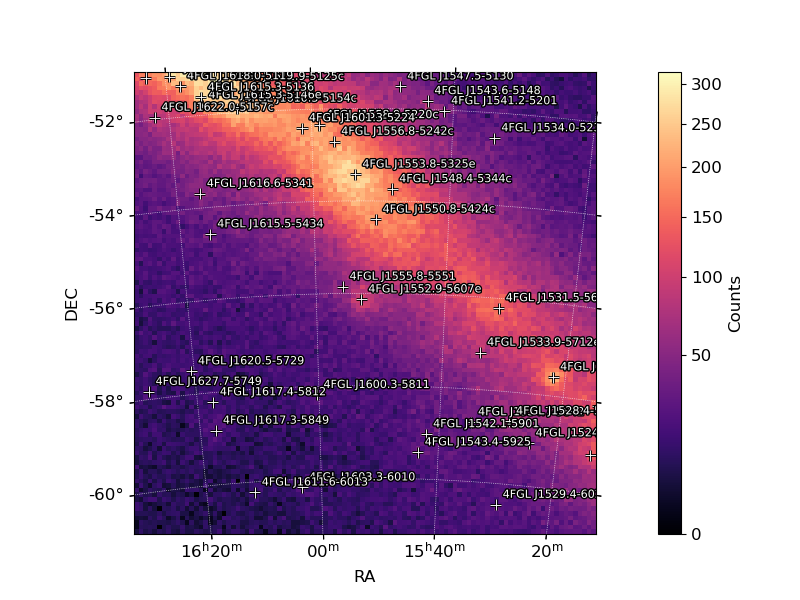

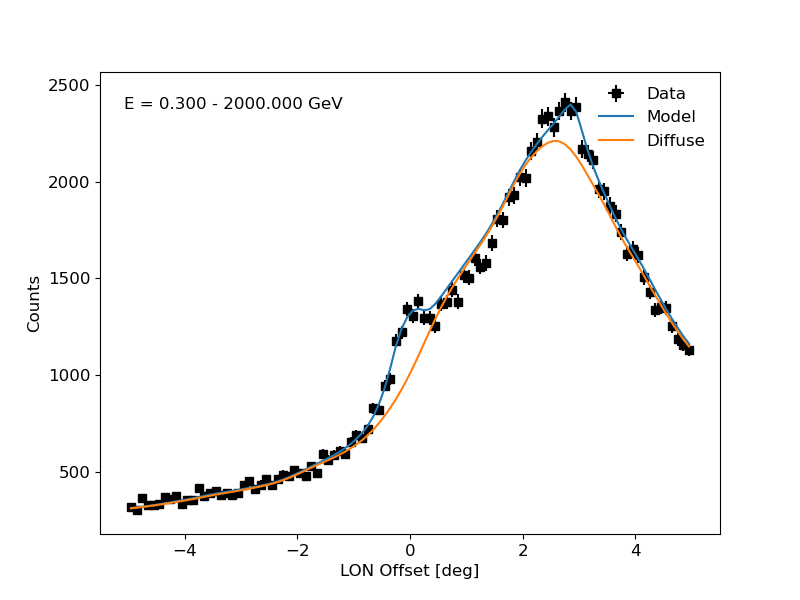

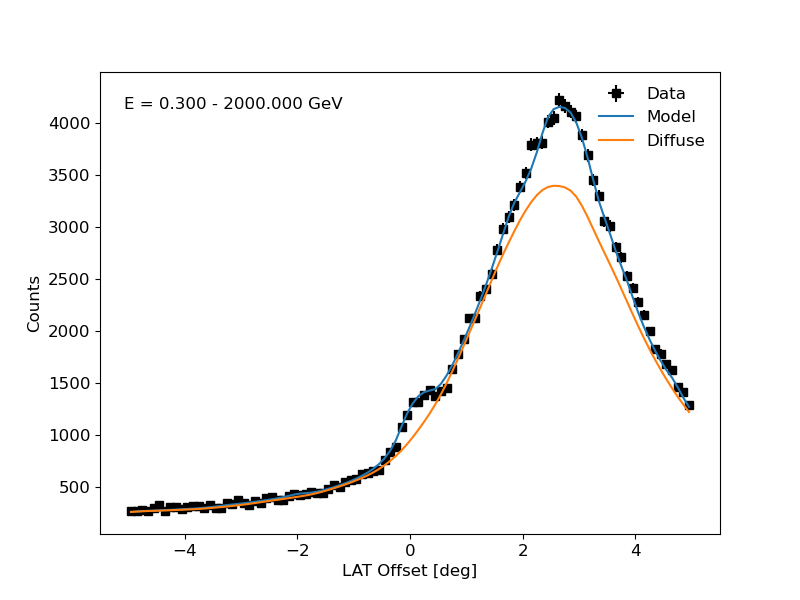

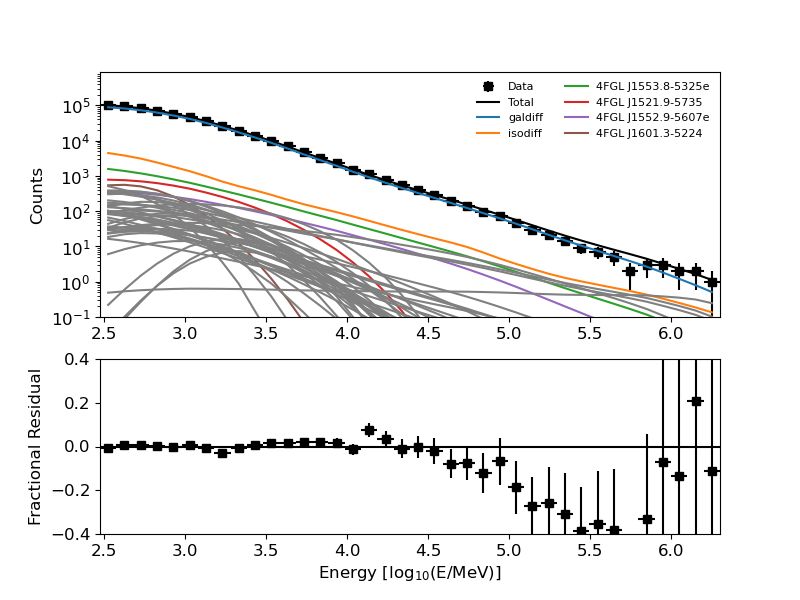

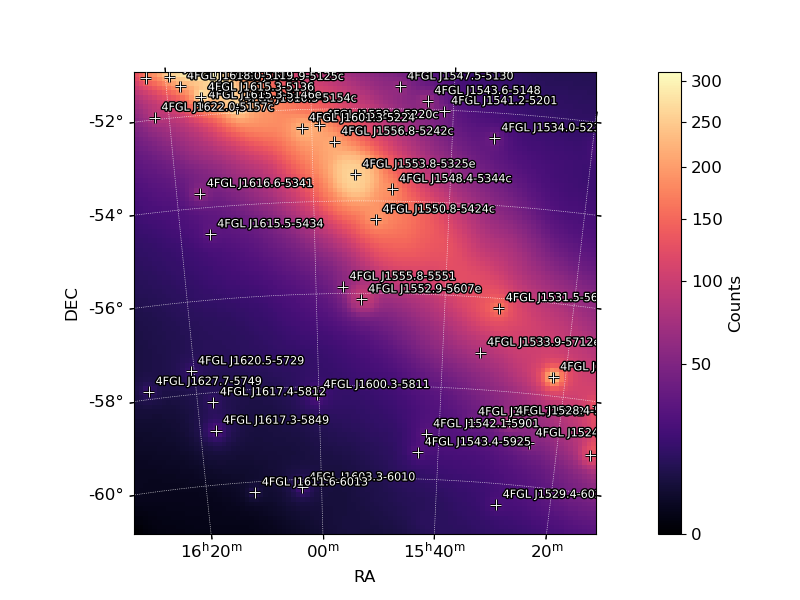

In [24]:
from IPython.display import display, Image
image_names = ['no_pwn_baseline_model_counts_map_2.477_6.301', 'no_pwn_baseline_model_counts_map_xproj_2.477_6.301', 'no_pwn_baseline_model_counts_map_yproj_2.477_6.301',
              'no_pwn_baseline_model_counts_spectrum', 'no_pwn_baseline_model_model_map_2.477_6.301']
for i in image_names:
    display(Image('data_300mev-2tev_12-year/%s.png'%i))

# Source detection

Let's make a TS map of the global source model above. Any TS values present in the region reflect residual emission not being modeled. Remember, $\sqrt{TS} \propto \sigma$, where $\sigma$ is the detection significance. A TS value of 25 or greater is considered a significant source detection. 

In [25]:
global_ts = gta.tsmap('300mev-2tev_global_model',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2023-05-23 17:37:08 INFO    GTAnalysis.tsmap(): Generating TS map
2023-05-23 17:37:25 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2023-05-23 17:37:36 INFO    GTAnalysis.tsmap(): Finished TS map
2023-05-23 17:37:42 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/300mev-2tev_global_model_pointsource_powerlaw_2.00_tsmap.npy
2023-05-23 17:37:42 INFO    GTAnalysis.tsmap(): Execution time: 33.58 s


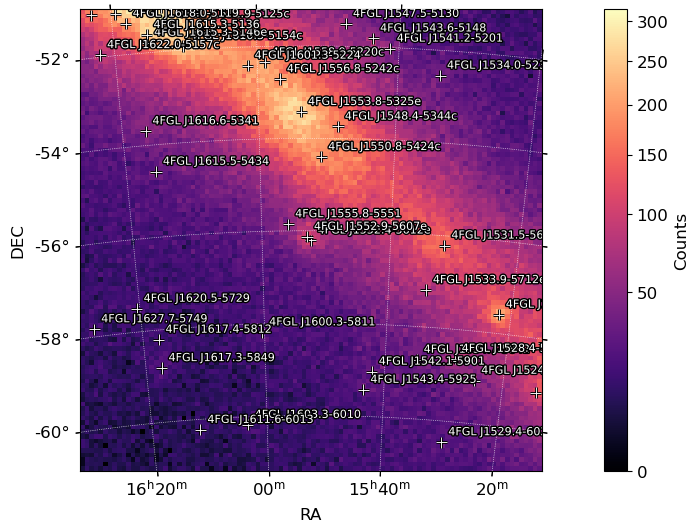

<Figure size 800x600 with 0 Axes>

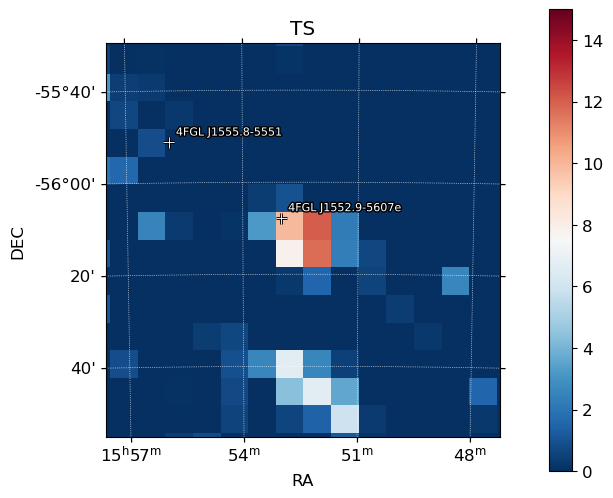

In [26]:
from fermipy.plotting import ROIPlotter
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(global_ts['ts'],roi=gta.roi).plot(zoom=7,vmin=np.min(global_ts['ts']),vmax=15,subplot=122,cmap='RdBu_r')
plt.gca().set_title('TS')
plt.show()

**NOTE: 4FGL J1552.9-5607e is a separate source that is a part of the global source model considered in the TS map above.** This means the TS values we see there are unlikely to be related to 4FGL J1552.9-5607e, despite overlapping in location with it.

There is a cumulative TS value that coincides with the source position of MSH 15-56 roughly = 10 + 8 + 12 + 14 = 44, which is a large residual significance not being modeled ($TS = 44 \sim 6 \sigma $).

In order to properly account for this emission in our source model, we begin by placing a point source at the location of the TS peak. 

## Add a point source at peak residual location to the model

In [27]:
gta.add_source('ps',{'ra' : 238.11, 'dec' : -56.210, 'SpectrumType' : 'PowerLaw', 'Index' : 2.0, 'SpatialModel' : 'PointSource'})

2023-05-23 17:37:42 INFO    GTAnalysis.add_source(): Adding source ps


In [28]:
gta.print_roi()

2023-05-23 17:38:00 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
ps                  PointSource    PowerLaw          0.000       nan       415.6
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112   1520.97      2686.9
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     12.89        97.9
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     88.99      1593.5
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.27       434.0
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.44       725.0
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.31        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1396.49      8667.4
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.30      1817.3
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [29]:
gta.fit(min_fit_quality=3)

2023-05-23 17:38:00 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2023-05-23 17:39:30 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:39:30 INFO    GTAnalysis.fit(): LogLike:   628063.281 DeltaLogLike:       10.985 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 10.985175327397883,
 'edm': 1.4721619513728115e-05,
 'loglike': 628063.2814754511,
 'covariance': array([[ 4.25434175e-04, -3.39224388e-04, -1.69480180e-05, ...,
         -4.90198192e-06,  6.26641054e-05,  1.92674649e-05],
        [-3.39224388e-04,  2.65197537e-03,  1.53613795e-05, ...,
          4.15737945e-06,  1.72157327e-05, -7.35495835e-06],
        [-1.69480180e-05,  1.53613795e-05,  3.95798892e-04, ...,
         -1.83886814e-06,  1.40922314e-04,  1.02732090e-05],
        ...,
        [-4.90198192e-06,  4.15737945e-06, -1.83886814e-06, ...,
          4.18827956e-06, -2.89829073e-05, -1.05651267e-05],
        [ 6.26641054e-05,  1.72157327e-05,  1.40922314e-04, ...,
         -2.89829073e-05,  9.10527741e-03, -5.73674054e-05],
        [ 1.92674649e-05, -7.35495835e-06,  1.02732090e-05, ...,
         -1.05651267e-05, -5.73674054e-05,  6.25743288e-02]]),
 'correlation': array([[ 1.00000000e+00, -3.19364131e-01, -4

In [30]:
print(gta.roi['ps'])

Name           : ps
Associations   : ['ps']
RA/DEC         :    238.110/   -56.210
GLON/GLAT      :    326.208/    -1.748
TS             : 71.01
Npred          : 532.33
Flux           : 4.272e-09 +/- 8.34e-10
EnergyFlux     : 1.128e-05 +/-  2.2e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.281e-12 +/-  2.501e-13
b'Index'       :         -2 +/-        nan
b'Scale'       :       1000 +/-        nan


In [31]:
gta.free_source('ps')

2023-05-23 17:39:30 INFO    GTAnalysis.free_source(): Freeing parameters for ps                    : ['Index']


In [32]:
ps_fit = gta.fit(min_fit_quality=3)

2023-05-23 17:39:30 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 17:40:53 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:40:53 INFO    GTAnalysis.fit(): LogLike:   628063.478 DeltaLogLike:        0.197 


In [33]:
gta.print_roi()

2023-05-23 17:40:53 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
ps                  PointSource    PowerLaw          0.000     66.82       475.3
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    851.57      2170.4
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     15.51       114.1
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.07      1594.3
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.18       433.8
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.36       724.0
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.30        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1395.38      8664.3
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.02      1816.2
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [34]:
print(gta.roi['ps'])

Name           : ps
Associations   : ['ps']
RA/DEC         :    238.110/   -56.210
GLON/GLAT      :    326.208/    -1.748
TS             : 66.82
Npred          : 475.25
Flux           : 3.792e-09 +/- 9.99e-10
EnergyFlux     : 1.247e-05 +/- 3.23e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.149e-12 +/-  2.936e-13
b'Index'       :     -1.939 +/-    0.09047
b'Scale'       :       1000 +/-        nan


In [35]:
ps = gta.write_roi('ps_model.npy',make_plots=True)

2023-05-23 17:40:53 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ps_model_00.xml...
2023-05-23 17:40:54 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ps_model.fits...
2023-05-23 17:41:01 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ps_model.npy...


The point source is clearly a significant source, with a TS value = 67. Let's make a TS map of the new global source model including this source to see if there remains any significant residual emission.

In [36]:
ps_ts = gta.tsmap('300mev-2tev_ps_model',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2023-05-23 17:41:03 INFO    GTAnalysis.tsmap(): Generating TS map
2023-05-23 17:41:20 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2023-05-23 17:41:30 INFO    GTAnalysis.tsmap(): Finished TS map
2023-05-23 17:41:36 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/300mev-2tev_ps_model_pointsource_powerlaw_2.00_tsmap.npy
2023-05-23 17:41:36 INFO    GTAnalysis.tsmap(): Execution time: 32.85 s


<Figure size 800x600 with 0 Axes>

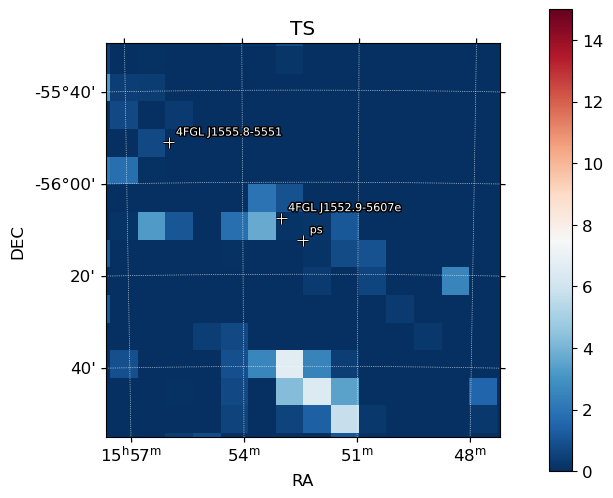

In [37]:
from fermipy.plotting import ROIPlotter
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(ps_ts['ts'],roi=gta.roi).plot(zoom=7,vmin=np.min(ps_ts['ts']),vmax=15,subplot=122,cmap='RdBu_r')
plt.gca().set_title('TS')
plt.show()

It looks pretty good, definitely better than the source model where there was no source there. Let's run some extension tests to see if there is a better spatial template. We take advantage of some of the extension options, too, like letting the position vary.

## Extension fitting

In [38]:
rd = gta.extension('ps',fit_position=True,spatial_model='RadialDisk')

2023-05-23 17:41:36 INFO    GTAnalysis.extension(): Running extension fit for ps
2023-05-23 17:42:18 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.099 Offset =    0.008 LogLikelihood =  628065.89 Delta-LogLikelihood =     2.41
2023-05-23 17:43:00 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.099 Offset =    0.008 LogLikelihood =  628065.89 Delta-LogLikelihood =    -0.00
2023-05-23 17:43:00 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-05-23 17:43:06 INFO    GTAnalysis._extension(): Generating TS map.
2023-05-23 17:43:27 INFO    GTAnalysis._extension(): Testing point-source model.
2023-05-23 17:43:27 INFO    GTAnalysis.localize(): Running localization for ps
2023-05-23 17:44:00 INFO    GTAnalysis._localize(): Localization succeeded.
2023-05-23 17:44:00 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  238.1008 +/-   0.0252,  -56.2040 +/-   0.0222)
(glon,glat) = (  326.2076 +/-   0.0257,   -1.7398

{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': Tr

2023-05-23 17:44:28 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ps_ext.npy
2023-05-23 17:44:28 INFO    GTAnalysis.extension(): Execution time: 171.38 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([  0.54169705,

In [39]:
rg = gta.extension('ps',fit_position=True,spatial_model='RadialGaussian')

2023-05-23 17:44:28 INFO    GTAnalysis.extension(): Running extension fit for ps
2023-05-23 17:45:12 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.092 Offset =    0.009 LogLikelihood =  628065.70 Delta-LogLikelihood =     2.22
2023-05-23 17:45:55 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.091 Offset =    0.009 LogLikelihood =  628065.70 Delta-LogLikelihood =     0.00
2023-05-23 17:45:56 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-05-23 17:46:02 INFO    GTAnalysis._extension(): Generating TS map.
2023-05-23 17:46:23 INFO    GTAnalysis._extension(): Testing point-source model.
2023-05-23 17:46:23 INFO    GTAnalysis.localize(): Running localization for ps
2023-05-23 17:46:54 INFO    GTAnalysis._localize(): Localization succeeded.
2023-05-23 17:46:54 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  238.1007 +/-   0.0252,  -56.2040 +/-   0.0222)
(glon,glat) = (  326.2075 +/-   0.0257,   -1.7398

{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_f

2023-05-23 17:47:34 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/msh15-56_simple_extension_analysis_example/data_300mev-2tev_12-year/ps_ext.npy
2023-05-23 17:47:34 INFO    GTAnalysis.extension(): Execution time: 186.72 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([  0.55095

In [40]:
print('LogLikelihood :', rd['loglike_ext'])
print('TS_ext :', rd['ts_ext'])
print('RA,Dec J2000 in deg :', rd['ra'],rd['dec'])
print('Best-fit extension in deg :', rd['ext'])
print('Error on extension in deg :', rd['ext_err'])
print('95% upper limit on extension in deg :', rd['ext_ul95'])

LogLikelihood : 628065.8879354886
TS_ext : 5.598218302708119
RA,Dec J2000 in deg : 238.1043349424472 -56.202148419185384
Best-fit extension in deg : 0.09853942933061281
Error on extension in deg : 0.01969569035843375
95% upper limit on extension in deg : 0.1301486325886131


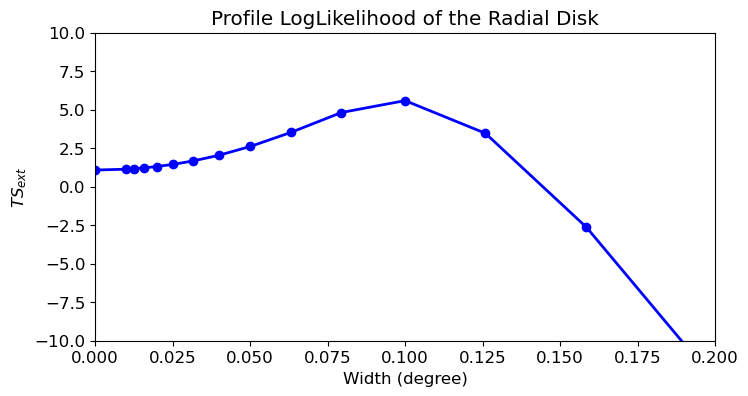

In [41]:
plt.figure(figsize=(8,4))
width = rd['width']
ts_ext = 2*rd['dloglike']
plt.ylim(-10,10)
plt.xlim(0,0.2)
plt.plot(width,ts_ext,marker='o',color='blue',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Disk')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

I have truncated the y- and x-axis limits to emphasize the peak of the Loglikelihood testing a radial disk of varying sizes. We can see from above that the best-fit extension found for the source is 0.1 deg +/- 0.02, with TS_ext = 5. Indeed, we see here that the maximized TS value of 5 is achieved for 0.1deg width. If we remove the limits on the axes, we can confirm this is the only peak in the profile.

In [42]:
print('LogLikelihood :', rg['loglike_ext'])
print('TS_ext :', rg['ts_ext'])
print('RA,Dec J2000 in deg :', rg['ra'],rg['dec'])
print('Best-fit extension in deg :', rg['ext'])
print('Error on extension in deg :', rg['ext_err'])
print('95% upper limit on extension in deg :', rg['ext_ul95'])

LogLikelihood : 628065.7018963193
TS_ext : 5.226139964070171
RA,Dec J2000 in deg : 238.10125250677928 -56.20237487298599
Best-fit extension in deg : 0.09145849559164665
Error on extension in deg : 0.025520374527403786
95% upper limit on extension in deg : 0.13186348957273172


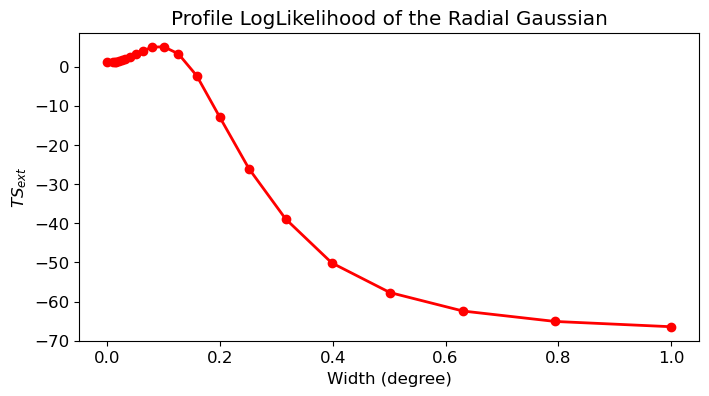

In [43]:
plt.figure(figsize=(8,4))
width = rg['width']
ts_ext = 2*rg['dloglike']
plt.plot(width,ts_ext,marker='o',color='red',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Gaussian')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

## Custom spatial templates

Sometimes the radial disk or gaussian templates offered by Fermi are too simple to adequately model extended source emission. Sometimes you need to test a custom spatial template. To do so, one actually has to **make** their own spatial template, which is not trivial. We will not do that here, but you can explore the ways in which we make custom spatial templates [here](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/extended/extended.html).

One option would be to take the source shape and size directly from a real observation in another wavelength (radio, X-ray, TeV, etc). In our case, we will test the radio shape and size for the PWN in MSH 15-56. 

### Radio shape of MSH 15-56 displayed below

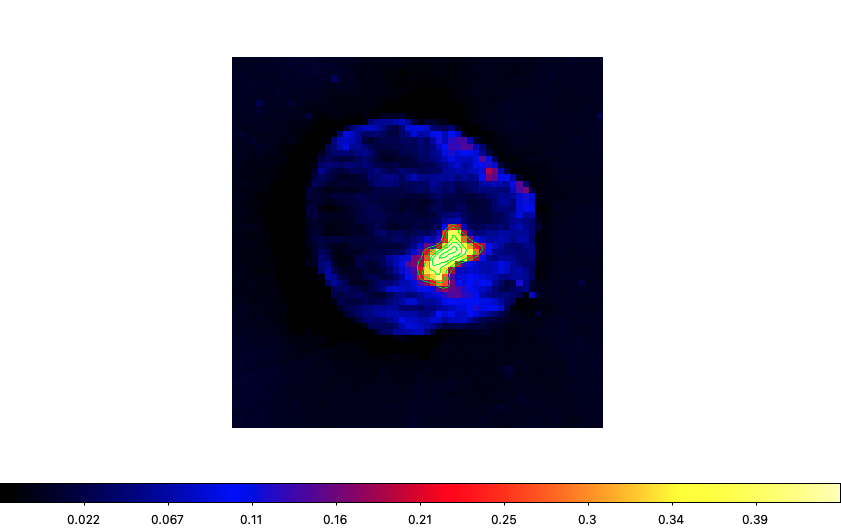

In [44]:
from IPython.display import Image
display(Image('msh15-56_radio_pwn_snr.png'))

The PWN is the bright somewhat off-set central core. The green contours show the increasing radio flux of the PWN towards its peak/center. Lucky for us, someone already make us the custom spatial template of *just* the radio PWN! 

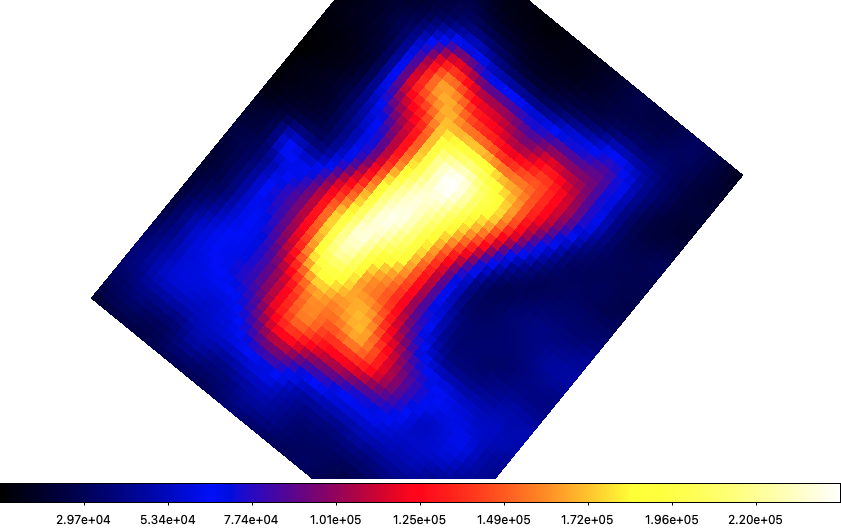

In [45]:
display(Image('msh15-56_pwn_mask.png'))

Next, we need to know where this is located within the FermiPy software. This is within the ```$CONDA_PREFIX``` directory. Specifically, the path to our needed file is ```/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates```

In [46]:
!ls /opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates

CenALobes.fits	    LMC-30DorWest.fits	   RCW86.fits		     W3.fits
CygnusLoop.fits     LMC-FarWest.fits	   Rosette.fits		     W44.fits
FornaxA.fits	    LMC-Galaxy.fits	   RXJ1713_2016_250GeV.fits  W51C.fits
G279.0+1.1.fits     LMC-North.fits	   S147.fits
HB9.fits	    MSH15-56_PWN.fits	   SMC-Galaxy.fits
HESSJ1841-055.fits  MSH15-56_SNRmask.fits  VelaX_radio.fits


## Test the extension of the source using this custom spatial template

Unfortunately gta.extension() does not support custom spatial templates, so we will need to delete the ```ps``` source and replace it with a new source that uses the custom spatial template. In order to understand if the custom template improves the fit, we must consider the LogLikelihood values of the fit as well as the TS of the source. 

In [47]:
gta.delete_source('ps')

2023-05-23 17:47:36 INFO    GTAnalysis.delete_source(): Deleting source ps


In [48]:
gta.add_source('radio_pwn',{'ra' : 238.11, 'dec' : -56.210, 'SpectrumType' : 'PowerLaw', 'Index' : 2.0, 'SpatialModel' : 'SpatialMap', 'Spatial_Filename' : '/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates/MSH15-56_PWN.fits'})

2023-05-23 17:47:36 INFO    GTAnalysis.add_source(): Adding source radio_pwn


In [49]:
gta.print_roi()

2023-05-23 17:48:24 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
radio_pwn           SpatialMap     PowerLaw          0.000       nan       458.8
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    851.57      2170.4
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     15.51       114.1
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.07      1594.3
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.18       433.8
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.36       724.0
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.30        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1395.38      8664.3
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.02      1816.2
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [50]:
print(gta.roi['radio_pwn']['Spatial_Filename'])

/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates/MSH15-56_PWN.fits


In [51]:
gta.fit(min_fit_quality=3)

2023-05-23 17:48:24 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2023-05-23 17:50:18 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:50:18 INFO    GTAnalysis.fit(): LogLike:   628065.012 DeltaLogLike:        2.042 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 2.042158228578046,
 'edm': 7.189744956006178e-06,
 'loglike': 628065.0122178197,
 'covariance': array([[ 4.25443785e-04, -3.39216270e-04, -1.69513820e-05, ...,
         -4.90302043e-06,  6.25892207e-05,  2.56546482e-05],
        [-3.39216270e-04,  2.65198190e-03,  1.53608720e-05, ...,
          4.15779038e-06,  1.72116066e-05, -8.73602077e-06],
        [-1.69513820e-05,  1.53608720e-05,  3.95814494e-04, ...,
         -1.83948472e-06,  1.40858374e-04,  1.41571709e-05],
        ...,
        [-4.90302043e-06,  4.15779038e-06, -1.83948472e-06, ...,
          4.18900852e-06, -2.89698065e-05, -1.33817043e-05],
        [ 6.25892207e-05,  1.72116066e-05,  1.40858374e-04, ...,
         -2.89698065e-05,  9.10383445e-03, -8.44001782e-05],
        [ 2.56546482e-05, -8.73602077e-06,  1.41571709e-05, ...,
         -1.33817043e-05, -8.44001782e-05,  7.68177102e-02]]),
 'correlation': array([[ 1.00000000e+00, -3.19352488e-01, -4.1

In [52]:
gta.print_roi()

2023-05-23 17:50:18 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
radio_pwn           SpatialMap     PowerLaw          0.000    101.64       706.0
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    664.80      1966.8
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     16.48       119.8
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.11      1594.6
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.13       433.6
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.42       724.9
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.29        19.3
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1396.05      8666.8
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.28      1817.3
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [53]:
gta.free_source('radio_pwn')

2023-05-23 17:50:18 INFO    GTAnalysis.free_source(): Freeing parameters for radio_pwn             : ['Index']


In [54]:
radio_fit = gta.fit(min_fit_quality=3)

2023-05-23 17:50:18 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 17:52:10 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 17:52:10 INFO    GTAnalysis.fit(): LogLike:   628065.338 DeltaLogLike:        0.326 


In [55]:
gta.print_roi()

2023-05-23 17:52:10 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
radio_pwn           SpatialMap     PowerLaw          0.000     95.22       634.9
4FGL J1552.9-5607e  SpatialMap     LogParabola       0.112    688.14      2005.7
4FGL J1555.8-5551   PointSource    PowerLaw          0.600     16.52       120.2
4FGL J1550.8-5424c  PointSource    LogParabola       1.822     89.11      1594.6
4FGL J1600.3-5811   PointSource    LogParabola       2.249    112.17       433.7
4FGL J1548.4-5344c  PointSource    LogParabola       2.536     39.36       724.6
4FGL J1533.9-5712e  RadialDisk     PowerLaw          2.717     18.30        19.2
4FGL J1553.8-5325e  RadialDisk     LogParabola       2.791   1395.25      8664.1
4FGL J1531.5-5612   PointSource    PLSuperExpCuto    2.898    211.00      1816.1
4FGL J1542.1-5901   PointSource    LogParabola       3.1

In [56]:
print(gta.roi['radio_pwn'])

Name           : radio_pwn
Associations   : ['radio_pwn']
RA/DEC         :    238.110/   -56.210
GLON/GLAT      :    326.208/    -1.748
TS             : 95.22
Npred          : 634.88
Flux           : 4.587e-09 +/- 1.04e-09
EnergyFlux     : 1.524e-05 +/-  3.6e-06
SpatialModel   : SpatialMap
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.391e-12 +/-  3.073e-13
b'Index'       :     -1.936 +/-    0.07492
b'Scale'       :       1000 +/-        nan


# Recap

Remember we saved our baseline model loglike value in the ```baseline_fit``` up above. We can also compare the properties found for the ```radio_pwn``` to the properties of ```4FGL J1552.4-5612e``` up above. We should have fairly consistent values.

In [57]:
print('LogLike of 4FGL J1552.4-5612e:', baseline_fit['loglike']) 
print('LogLike of radio_pwn:', radio_fit['loglike'])

LogLike of 4FGL J1552.4-5612e: 628067.6374291807
LogLike of radio_pwn: 628065.3382707264


4FGL J1552.4-5612e has TS = 100.24. While we did reproduce approximately the same statistical model, the difference in the TS for the ```radio_pwn``` here (95) and of 4FGL J1552.4-5612e is explained by the difference in the spectrum used. Here we assumed a simple power law, but 4FGL J1552.4-5612e is better fit with a LogParabola spectral shape. 